In [17]:
push!(LOAD_PATH, ".")

5-element Array{ByteString,1}:
 "/Applications/Julia-0.4.1.app/Contents/Resources/julia/local/share/julia/site/v0.4"
 "/Applications/Julia-0.4.1.app/Contents/Resources/julia/share/julia/site/v0.4"      
 "/Users/rdeits/6.338/hw2"                                                           
 "/Users/rdeits/6.338/julia-mindstorms-mapping"                                      
 "."                                                                                 

In [12]:
using ProfileView

In [62]:
import Constraints
reload("Constraints")

In [63]:
p = Constraints.Problem()
Constraints.addVariable!(p, :x, [0, 0], [10, 10])
Constraints.addConstraint!(p, [:x], x -> x[1] == x[2])
Constraints.addConstraint!(p, [:x], x -> x[1] == 5)
Constraints.addConstraint!(p, [:x], x -> x[2] == 5)
solutions = Constraints.solve(p, 1)

num_nodes_explored = 12

1-element Array{Dict{Symbol,Array{T,N}},1}:
 Dict{Symbol,Array{T,N}}(:x=>[5,5])


num_nodes_explored = 1479
potential_solution = Dict(:poses=>Constraints.SealedArray([1,7,3,3,1,2,1,3,2,1],(5,2),Bool[false false
     true true
     false false
     false false
     true true]))
potential_solution = Dict(:poses=>Constraints.SealedArray([7,1,2,8,3,1,4,3,2,1],(5,2),Bool[true true
     false false
     false false
     false false
     true true]))
potential_solution = Dict(:poses=>Constraints.SealedArray([6,5,2,4,8,4,4,3,2,1],(5,2),Bool[true false
     true false
     false false
     false false
     false false]))

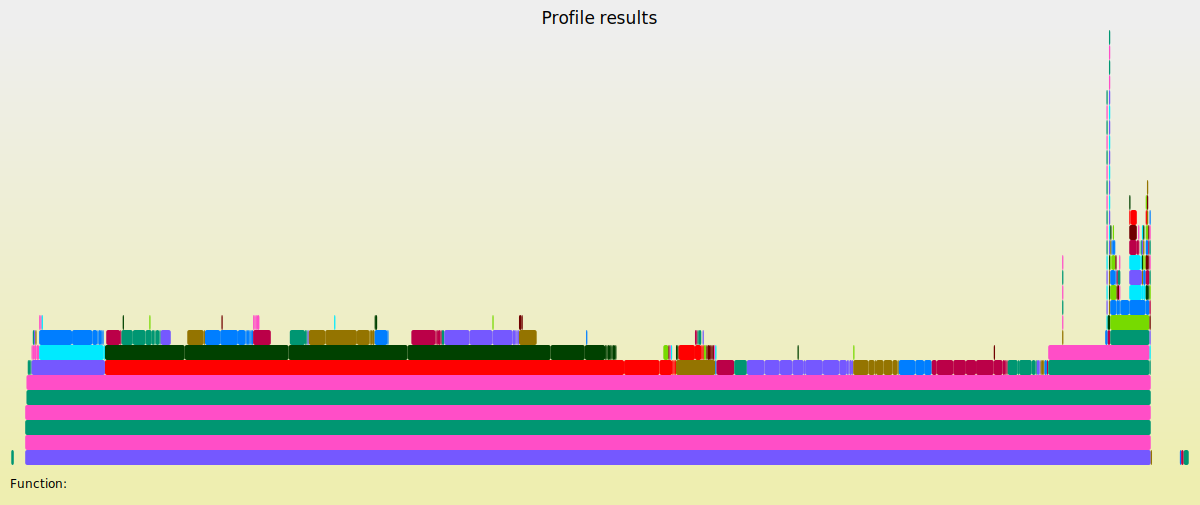


num_nodes_explored = 302023
  1.203489 seconds (3.03 M allocations: 107.631 MB, 2.34% gc time)
64 ^ num_rooks = 1073741824


In [64]:
function rooks(num_rooks)
    p = Constraints.Problem()
    Constraints.addVariable!(p, :poses, ones(Int, num_rooks, 2), 8*ones(Int, num_rooks, 2))
    for i = 1:num_rooks-1
        for j = i+1:num_rooks
            Constraints.addConstraint!(p, [:poses], poses -> poses[i, 1] != poses[j, 1] && poses[i, 2] != poses[j, 2])
        end
    end
    return Constraints.solve(p, 1)
end
rooks(3)
Profile.clear() 
num_rooks = 5
@time @profile solutions = rooks(num_rooks)
@show 64 ^ num_rooks
ProfileView.view()

In [49]:
solutions

1-element Array{Dict{Symbol,Array{T,N}},1}:
 Dict{Symbol,Array{T,N}}(:poses=>5x2 Array{Int64,2}:
 5  5
 4  4
 3  3
 2  2
 1  1)

In [165]:
d = Dict(:foo => 1, :bar => 2)

Dict{Symbol,Int64} with 2 entries:
  :bar => 2
  :foo => 1

In [84]:
getindex(d, :bar)

2

In [125]:
a = [1 2 3; 4 5 6]

2x3 Array{Int64,2}:
 1  2  3
 4  5  6

In [126]:
length(a)

6

In [127]:
size(a)

(2,3)

In [132]:
a[6]

6

In [117]:
z = SealedScalar(1.0, false)

SealedScalar{Float64}(1.0,false)

In [113]:
z == 1

true

In [118]:
z < 2

true

In [119]:
z

SealedScalar{Float64}(1.0,true)

In [95]:
if z == 1
    @show z
end

true

In [135]:
q = 1
q[1]
length(q)

1

In [144]:
?findfirst

search: 

```
findfirst(A,v)
```

Return the index of the first element equal to `v` in `A`.

```
findfirst(A)
```

Return the index of the first non-zero value in `A` (determined by `A[i]!=0`).

```
findfirst(predicate, A)
```

Return the index of the first element of `A` for which `predicate` returns `true`.


findfirst



In [71]:
a = [1,2,3,4,5]
b = sub(a, 1:4)
c = reshape(b, 2, 2)
d = Reshape.myreshape(b, (2, 2))
a[1] = 4
@show a
@show b
@show c
@show d

a = [4,2,3,4,5]
b = [4,2,3,4]
c = [1 3
 2 4]
d = [4 3
 2 4]

2x2 Reshape.ReshapeArray{Int64,2,SubArray{Int64,1,Array{Int64,1},Tuple{UnitRange{Int64}},1},Tuple{Reshape.IndexMD{1,2}}}:
 4  3
 2  4

In [140]:
sub2ind(size(c), 3)

3